In [9]:
!pip install shapely
!pip install geopandas
!pip install folium
!pip install descartes
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline

In [10]:
plt.rcParams['figure.figsize'] = (20, 10)

In [11]:
geo_df = gpd.read_file('district-39.geojson')

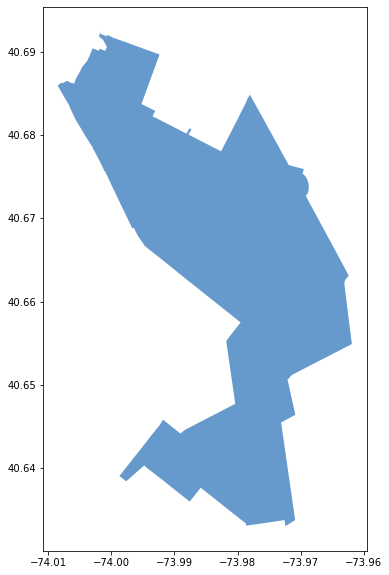

In [12]:
ax = geo_df.plot(color='#6699cc')

In [13]:
def list_coordinates(geometry):
    coordinates = list(geometry.exterior.coords)
    return (coordinates)

coordinates = geo_df.geometry.apply(list_coordinates)[0]

In [14]:
coordinates[0:10]

[(-73.9780443335201, 40.6848648670859),
 (-73.9774586590442, 40.6840605389783),
 (-73.9766680312539, 40.6829804668082),
 (-73.976570160538, 40.6828353110453),
 (-73.9763177217962, 40.6825168636468),
 (-73.9758354945955, 40.6818438810937),
 (-73.9751446042666, 40.6808801565149),
 (-73.9746926197494, 40.680274868138),
 (-73.9743119177113, 40.6797430740631),
 (-73.9735102689416, 40.6786473721218)]

In [15]:
d39 = pd.read_csv('D39.csv')

In [16]:
d39 = d39.dropna(subset=['Store'])
d39 = d39.dropna(subset=['Address'])

In [17]:
d39['Address'] = d39['Address'].astype(str) + ', Brooklyn, NY'

In [18]:
d39.head()

,Store,Address,Phone
0,Baciccia,"426 7th Ave, Brooklyn, NY",(718) 788-1000
1,Mike Daddy's Pizza,"449 7th Ave, Brooklyn, NY",718-768-9700
2,Pizzas Plus,"359 7th Ave, Brooklyn, NY",(718) 768-5327
3,Sotto Voce,"225 7th Ave, Brooklyn, NY",(718) 369-9322
4,Numero 28,"139 7th Ave, Brooklyn, NY",(718) 398-9198


In [20]:
!pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="your app name or e-mail address here")

def get_lat_lon(address_column):
    
    lat = []
    lon = []
    
    for a in address_column:
        location = geolocator.geocode(a)
        
        if location is not None:
            lat.append(location.latitude)
            lon.append(location.longitude)
        else:
            lat.append('NA')
            lon.append('NA')
    return lat, lon

     |████████████████████████████████| 112 kB 4.1 MB/s eta 0:00:01
  Using cached geographiclib-1.50-py3-none-any.whl (38 kB)


In [21]:
d39['lat'], d39['lon'] = get_lat_lon(d39.Address)

In [22]:
d39_clean = d39[d39.lat != 'NA']

In [23]:
d39_clean

,Store,Address,Phone,lat,lon
0,Baciccia,"426 7th Ave, Brooklyn, NY",(718) 788-1000,40.6638,-73.9844
1,Mike Daddy's Pizza,"449 7th Ave, Brooklyn, NY",718-768-9700,40.6629,-73.9847
2,Pizzas Plus,"359 7th Ave, Brooklyn, NY",(718) 768-5327,40.6659,-73.9822
3,Sotto Voce,"225 7th Ave, Brooklyn, NY",(718) 369-9322,40.6699,-73.9789
4,Numero 28,"139 7th Ave, Brooklyn, NY",(718) 398-9198,40.6727,-73.9764
...,...,...,...,...,...
692,Interference Archive,"314 7th St., Brooklyn, NY",NaN,40.6705,-73.9858
693,Van Brunt Post Office,"275 9th St., Brooklyn, NY",(718) 768-1284,40.6697,-73.9873
694,District Office of Council Member Brad Lander,"456 5th Ave., Brooklyn, NY",(718) 499-1090,40.6689,-73.9869
698,Arecibo Car and Limo Service,"171 5th Ave., Brooklyn, NY",(718) 783-6465,40.6773,-73.9797


In [24]:
in_district = []
coords = coordinates
poly = Polygon(coords)

for i in list(zip(d39_clean.lat,d39_clean.lon)):
    point = Point(i)
    if point.within(poly):
        in_district.append('Yes')
    else:
        in_district.append('Yes')

In [25]:
d39_clean['In District'] = in_district

In [26]:
d39 = d39[d39.lat != 'NA']

In [125]:
# m.save('d39.html')

In [124]:
# d39_clean.to_csv(r'/Users/avonleafisher/Desktop/Small Businesses\D39_Small_Businesses.csv', index=False)

In [123]:
dca = pd.read_csv('/Users/avonleafisher/Desktop/Brandon for City Council/dca.csv')

In [124]:
dca

,DCA Licens,License Ty,License Ex,License St,License Cr,Industry,Business N,Business_1,Address Bu,Address St,...,Community,Council Di,BIN,BBL,NTA,Census Tra,Detail,Longitude,Latitude,Location
0,2037734-DCA,Business,06/30/2022,Active,05/17/2016,Electronic & Appliance Service,GEEK SHOP INC,NaN,219,5TH AVE,...,306.0,39.0,3020110.0,3.009560e+09,NaN,NaN,NaN,-73.980741,40.675981,"(40.675980755706505, -73.98074127178114)"
1,2041431-DCA,Business,07/31/2021,Active,07/28/2016,Secondhand Dealer - General,"CARDENAS, AVELINA",MOBICOMPU REPAIR,537,5TH AVE,...,306.0,39.0,3023693.0,3.010420e+09,NaN,NaN,NaN,-73.988909,40.666032,"(40.66603201917596, -73.98890859831776)"
2,2062241-DCA,Business,12/31/2021,Active,12/01/2017,Laundries,NEW SOFO CLEANER INC,NaN,497,COURT ST,...,306.0,39.0,3336360.0,3.004740e+09,BK33,77.0,Laundry Type: Retail Laundry,-73.998980,40.675936,"(40.675935701840196, -73.99897974235112)"
3,2061350-DCA,Business,12/31/2021,Active,11/21/2017,Laundries,"FOUR SEASONS LAUNDROMAT, INC.",NaN,287,6TH AVE,...,306.0,39.0,3020872.0,3.009710e+09,BK37,155.0,Laundry Type: Retail Laundry,-73.979982,40.672761,"(40.67276100477928, -73.97998155089967)"
4,1041971-DCA,Business,12/31/2021,Active,12/31/2003,Tobacco Retail Dealer,"DITMAS FRUITS & DAIRY, INC.",NaN,124,DITMAS AVE,...,312.0,39.0,3126999.0,3.053950e+09,BK88,478.0,NaN,-73.977654,40.635583,"(40.63558250910922, -73.9776543756928)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,2097623-DCA,Business,02/28/2023,Active,01/29/2021,Home Improvement Contractor,PROGRESSIVE CONTRACTING NY CORP,NaN,88,CHURCH AVE,...,312.0,39.0,3125216.0,3.053520e+09,NaN,NaN,NaN,-73.979926,40.642582,"(40.642582133155265, -73.9799257446486)"
901,2018708-DCA,Business,02/28/2023,Active,02/26/2015,Home Improvement Contractor,KIMANI CONSTRUCTION CORPORATION,NaN,715,CHURCH AVE,...,312.0,39.0,3124387.0,3.053300e+09,NaN,NaN,NaN,-73.972660,40.645638,"(40.64563832564339, -73.97266014132616)"
902,1450781-DCA,Business,02/28/2023,Active,11/26/2012,Home Improvement Contractor,J. ALAM HOME IMPROVEMENT INC.,NaN,230,OCEAN PKWY,...,312.0,39.0,3124705.0,3.053380e+09,NaN,NaN,NaN,-73.974289,40.644203,"(40.644203179113966, -73.97428948259274)"
903,1268992-DCA,Business,02/28/2023,Active,09/27/2007,Home Improvement Contractor,FAME CONTRACTING INC.,NaN,140,OCEAN PKWY,...,312.0,39.0,3124302.0,3.053280e+09,NaN,NaN,NaN,-73.974898,40.645993,"(40.645992913009515, -73.97489779001468)"


In [125]:
dca.columns

Index(['DCA Licens', 'License Ty', 'License Ex', 'License St', 'License Cr',
       'Industry', 'Business N', 'Business_1', 'Address Bu', 'Address St',
       'Secondary', 'Address Ci', 'Address _1', 'Address ZI', 'Contact Ph',
       'Address Bo', 'Borough Co', 'Community', 'Council Di', 'BIN', 'BBL',
       'NTA', 'Census Tra', 'Detail', 'Longitude', 'Latitude', 'Location'],
      dtype='object')

In [126]:
dca.Secondary.unique()

array([nan, 'NEW BANGLALINK WIRELESS', 'ifixscreens.com store',
       '6 AVENUE', '415 E 5th St', 'ATLANTIC AVENUE', 'HMH Iron Design',
       'Inside Payomatic0145', '6TH AVE', 'Ground Floor',
       'UNIT 1, SUITE 133', 'Building 4 5th Floor', 'ROOM 101B',
       'ROOM 101A'], dtype=object)

In [127]:
dca[['Business N', 'Address Bu', 'Address St',
       'Secondary', 'Address Ci', 'Address _1', 'Address ZI', 'Contact Ph', 'Longitude', 'Latitude']]

,Business N,Address Bu,Address St,Secondary,Address Ci,Address _1,Address ZI,Contact Ph,Longitude,Latitude
0,GEEK SHOP INC,219,5TH AVE,NaN,BROOKLYN,NY,11215,9176422672,-73.980741,40.675981
1,"CARDENAS, AVELINA",537,5TH AVE,NaN,BROOKLYN,NY,11215,7187819115,-73.988909,40.666032
2,NEW SOFO CLEANER INC,497,COURT ST,NaN,BROOKLYN,NY,11231,718-852-8151,-73.998980,40.675936
3,"FOUR SEASONS LAUNDROMAT, INC.",287,6TH AVE,NaN,BROOKLYN,NY,11215,7183693328,-73.979982,40.672761
4,"DITMAS FRUITS & DAIRY, INC.",124,DITMAS AVE,NaN,BROOKLYN,NY,11218,718-853-9342,-73.977654,40.635583
...,...,...,...,...,...,...,...,...,...,...
900,PROGRESSIVE CONTRACTING NY CORP,88,CHURCH AVE,NaN,BROOKLYN,NY,11218,3473413808,-73.979926,40.642582
901,KIMANI CONSTRUCTION CORPORATION,715,CHURCH AVE,NaN,BROOKLYN,NY,11218,7189723155,-73.972660,40.645638
902,J. ALAM HOME IMPROVEMENT INC.,230,OCEAN PKWY,NaN,BROOKLYN,NY,11218,7187561800,-73.974289,40.644203
903,FAME CONTRACTING INC.,140,OCEAN PKWY,NaN,BROOKLYN,NY,11218,7184350693,-73.974898,40.645993


In [128]:
d39

,Store,Address,Phone,lat,lon
0,Baciccia,"426 7th Ave, Brooklyn, NY",(718) 788-1000,40.6638,-73.9844
1,Mike Daddy's Pizza,"449 7th Ave, Brooklyn, NY",718-768-9700,40.6629,-73.9847
2,Pizzas Plus,"359 7th Ave, Brooklyn, NY",(718) 768-5327,40.6659,-73.9822
3,Sotto Voce,"225 7th Ave, Brooklyn, NY",(718) 369-9322,40.6699,-73.9789
4,Numero 28,"139 7th Ave, Brooklyn, NY",(718) 398-9198,40.6727,-73.9764
...,...,...,...,...,...
692,Interference Archive,"314 7th St., Brooklyn, NY",NaN,40.6705,-73.9858
693,Van Brunt Post Office,"275 9th St., Brooklyn, NY",(718) 768-1284,40.6697,-73.9873
694,District Office of Council Member Brad Lander,"456 5th Ave., Brooklyn, NY",(718) 499-1090,40.6689,-73.9869
698,Arecibo Car and Limo Service,"171 5th Ave., Brooklyn, NY",(718) 783-6465,40.6773,-73.9797


In [129]:
dca['Address Bu'] = [str(i) for i in dca['Address Bu']]
dca['Address St'] = [str(i) for i in dca['Address St']]
dca['Address ZI'] = [str(i) for i in dca['Address ZI']]

In [130]:
dca.Secondary.unique()

array([nan, 'NEW BANGLALINK WIRELESS', 'ifixscreens.com store',
       '6 AVENUE', '415 E 5th St', 'ATLANTIC AVENUE', 'HMH Iron Design',
       'Inside Payomatic0145', '6TH AVE', 'Ground Floor',
       'UNIT 1, SUITE 133', 'Building 4 5th Floor', 'ROOM 101B',
       'ROOM 101A'], dtype=object)

In [131]:
dca['Address'] = dca['Address Bu'].str.cat(dca[['Address St', 'Address Ci', 'Address ZI']], sep=', ')

In [132]:
dca['Address']

0                  219, 5TH AVE, BROOKLYN, 11215
1                  537, 5TH AVE, BROOKLYN, 11215
2                 497, COURT ST, BROOKLYN, 11231
3                  287, 6TH AVE, BROOKLYN, 11215
4               124, DITMAS AVE, BROOKLYN, 11218
                         ...                    
900              88, CHURCH AVE, BROOKLYN, 11218
901             715, CHURCH AVE, BROOKLYN, 11218
902             230, OCEAN PKWY, BROOKLYN, 11218
903             140, OCEAN PKWY, BROOKLYN, 11218
904    3810, FORT HAMILTON PKWY, BROOKLYN, 11218
Name: Address, Length: 905, dtype: object

In [133]:
dca = dca[['Business N', 'Address', 'Contact Ph', 'Latitude', 'Longitude']]

In [134]:
dca.columns = d39.columns

In [135]:
dca

,Store,Address,Phone,lat,lon
0,GEEK SHOP INC,"219, 5TH AVE, BROOKLYN, 11215",9176422672,40.675981,-73.980741
1,"CARDENAS, AVELINA","537, 5TH AVE, BROOKLYN, 11215",7187819115,40.666032,-73.988909
2,NEW SOFO CLEANER INC,"497, COURT ST, BROOKLYN, 11231",718-852-8151,40.675936,-73.998980
3,"FOUR SEASONS LAUNDROMAT, INC.","287, 6TH AVE, BROOKLYN, 11215",7183693328,40.672761,-73.979982
4,"DITMAS FRUITS & DAIRY, INC.","124, DITMAS AVE, BROOKLYN, 11218",718-853-9342,40.635583,-73.977654
...,...,...,...,...,...
900,PROGRESSIVE CONTRACTING NY CORP,"88, CHURCH AVE, BROOKLYN, 11218",3473413808,40.642582,-73.979926
901,KIMANI CONSTRUCTION CORPORATION,"715, CHURCH AVE, BROOKLYN, 11218",7189723155,40.645638,-73.972660
902,J. ALAM HOME IMPROVEMENT INC.,"230, OCEAN PKWY, BROOKLYN, 11218",7187561800,40.644203,-73.974289
903,FAME CONTRACTING INC.,"140, OCEAN PKWY, BROOKLYN, 11218",7184350693,40.645993,-73.974898


In [136]:
combined_df = d39.append(dca)

In [137]:
combined_df['Store'] = combined_df['Store'].str.upper()
combined_df['Address'] = combined_df['Address'].str.upper()

In [138]:
combined_df

,Store,Address,Phone,lat,lon
0,BACICCIA,"426 7TH AVE, BROOKLYN, NY",(718) 788-1000,40.6638,-73.9844
1,MIKE DADDY'S PIZZA,"449 7TH AVE, BROOKLYN, NY",718-768-9700,40.6629,-73.9847
2,PIZZAS PLUS,"359 7TH AVE, BROOKLYN, NY",(718) 768-5327,40.6659,-73.9822
3,SOTTO VOCE,"225 7TH AVE, BROOKLYN, NY",(718) 369-9322,40.6699,-73.9789
4,NUMERO 28,"139 7TH AVE, BROOKLYN, NY",(718) 398-9198,40.6727,-73.9764
...,...,...,...,...,...
900,PROGRESSIVE CONTRACTING NY CORP,"88, CHURCH AVE, BROOKLYN, 11218",3473413808,40.6426,-73.9799
901,KIMANI CONSTRUCTION CORPORATION,"715, CHURCH AVE, BROOKLYN, 11218",7189723155,40.6456,-73.9727
902,J. ALAM HOME IMPROVEMENT INC.,"230, OCEAN PKWY, BROOKLYN, 11218",7187561800,40.6442,-73.9743
903,FAME CONTRACTING INC.,"140, OCEAN PKWY, BROOKLYN, 11218",7184350693,40.646,-73.9749


In [167]:
m = folium.Map(location=[40.6638, -73.984], tiles="openstreetmap", zoom_start=13)
folium.GeoJson(data=geo_df["geometry"]).add_to(m)


for i in range(0,len(combined_df)):
    popup = str(combined_df.iloc[i]['Store']) + ' ' + str(combined_df.iloc[i]['Address'])
    lat = combined_df.iloc[i]['lat']
    lon = combined_df.iloc[i]['lon']
    folium.CircleMarker((lat,lon), radius=3, popup=popup, color='red').add_to(m)

In [168]:
m